In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd
import os
from astropy.table import Table, vstack

In [3]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [4]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

In [5]:
import hickle as hkl
data_path = get_data_dir_path()
run_name = "catsim_low_density" # 8 to 15 galaxies

In [6]:
madness_results=[]
scarlet_results=[]

actual_photometry = []
madness_photometry = []
scarlet_photometry = []
blended_photometry = []

for file_num in range(19):
    madness_results.append(hkl.load(os.path.join(data_path, "results", run_name, "madness_reconstruction", str(file_num) + ".hkl")))
    scarlet_results.append(hkl.load(os.path.join(data_path, "results", run_name, "scarlet_reconstruction", str(file_num) + ".hkl")))
    
    actual_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "actual_photometry", str(file_num) + ".hkl")))
    madness_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "madness_photometry", str(file_num) + ".hkl")))
    scarlet_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "scarlet_photometry", str(file_num) + ".hkl")))
    blended_photometry.append(hkl.load(os.path.join(data_path, "results", run_name, "blended_photometry",  str(file_num) + ".hkl")))


        
madness_results = vstack(madness_results)
scarlet_results = vstack(scarlet_results)

actual_photometry = vstack(actual_photometry)
madness_photometry = vstack(madness_photometry)
scarlet_photometry = vstack(scarlet_photometry)
blended_photometry = vstack(blended_photometry)

In [7]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    madness_results[band+"_relative_flux_err"] = (madness_results[band+"_predicted_flux"]-madness_results[band+"_actual_flux"])/madness_results[band+"_actual_flux"]
    scarlet_results[band+"_relative_flux_err"] = (scarlet_results[band+"_predicted_flux"]-scarlet_results[band+"_actual_flux"])/scarlet_results[band+"_actual_flux"]

In [8]:
scarlet_results

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,r_band_snr,ref_mag,btk_size,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.9989863293175897,11091.220029558186,10085.845506506445,0.0016514175897172079,0.998912564155861,85001.56183074706,81168.9906751551,0.004883096828267819,0.9988007511128931,220388.43841739534,211676.43875792227,0.00923764792178261,0.9987539855516679,286999.2965947264,279810.3009540995,0.008571050323501583,0.9987012651956195,243663.07545073424,248196.67929563794,0.007632375685734383,0.9986763125908321,124399.1974934924,114801.51169846421,0.008140499117066158,0,2.934391691481652,0,0,402700974452,12.312215341975133,1.1502970222887008,0.92939889431,1.52888593949e-19,1.87639304513e-17,0.0,0.103462003171,0.63225120306,0.0748507976532,0.374639600515,224.244827271,224.244827271,24.3499164581,24.3860778809,24.0959835052,23.4892063141,23.1251525879,23.0250339508,96.86181000637494,23.4892063141,2.934391691481652,163.5610767830227,107.75148512149103,0.0,0.0,0.0,0.0,0.0,0.0,-0.09064598126918506,-0.04508824394572035,-0.03953020277303909,-0.02504882669025668,0.01860603555346793,-0.07715231278345072
0.9912000478432066,1037.598037178862,118.84765422112356,0.011283379026122198,0.9905453864340712,45971.83284291776,40866.213790537455,0.00403982974440964,0.9896128330238011,100247.58207408001,83400.06431320499,0.007919439755335489,0.9892419465276012,70700.76099157345,67332.15276952948,0.012728962465253346,0.9888365003198389,41297.25010053493,34194.991446629625,0.016476949193440116,0.9886502777406314,18242.641931918188,7502.433743781633,0.020205648337178084,1,3.20668812036312,0,0,402703695649,14.544104257126662,7.114506678623506,3.22528791428,0.0,1.97217807852e-18,0.0,0.0,0.688130497932,0.0,0.623354494572,0.0,341.729522705,26.9207649231,25.0528125763,24.9506931305,25.0097541809,25.0517215729,25.1087379456,44.60263238955758,25.0097541809,3.20668812036312,174.72052140621386,137.57253349562268,0.0,0.0,0.0,0.0,0.0,0.0,-0.8854588675357753,-0.11105972367527348,-0.16805909341958197,-0.04764599665971718,-0.17197897285207644,-0.5887419282919203
0.9960897896521828,8720.613220749277,9039.23668983394,0.0014067700349087442,0.9956926286473069,66592.48838640552,63018.37479132533,0.0019020802710597584,0.9951117866857522,128773.7828390781,124541.70909111392,0.0033745694277356186,0.9948735259677384,103375.18918467802,103971.08419740736,0.003851706499187313,0.9946125139218813,74608.25445650215,92640.60012360233,0.0036501081473753194,0.9944905523804688,43778.49377571314,35638.406381535446,0.003205386173519842,2,2.9987727965302757,0,0,402702291885,-6.411101875014888,14.782820665450881,1.6642203331,1.95283900939e-19,7.89798335438e-18,0.0,0.141510695219,0.651383280754,0.139605402946,0.627531170845,140.861190796,140.861190796,24.6102561951,24.6504096985,24.6787395477,24.5972042084,24.4094905853,24.1582489014,57.137388551787396,24.5972042084,2.998

In [9]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
6846.603924556973,345.63698975445817,0,53040.52799949647,1390.1484512116863,0,145319.52455429078,3195.6092259536363,0,191232.85067779542,3857.5781760548944,0,170290.1605142212,4463.841104152902,0,83760.32484249114,4784.979128089276,0,0,0,0
44.59037703275667,345.5490302188045,0,26266.874303152563,1389.7946788554777,0,53220.237075805664,3194.7959903568185,0,43322.28072479249,3856.596479086191,0,25578.68781270504,4462.705122176459,0,11304.581603507995,4783.76142120403,0,1,0,0
5588.7367781448365,345.72492691139684,0,37397.6571255493,1390.502133560931,0,73220.94615570069,3196.4222546465917,0,65000.18975044253,3858.5596232596954,0,41914.76630447387,4464.976797112164,0,28164.77052259445,4786.196525164842,0,2,0,0
3787.510119018555,345.63698975445817,0,27140.212780336147,1390.1484512116863,0,70002.69896087646,3195.6092259536367,0,88299.57568771362,3857.578176054894,0,68070.98747512817,4463.8411041529025,0,39351.25132247926,4784.979128089276,0,3,0,0
25357.02778778076,345.7249269113968,0,218932.8644213867,1390.5021335609306,0,494933.27039794927,3196.4222546465917,0,491689.6596020508,3858.559623259695,0,336088.6365759277,4464.976797112165,0,158697.90422180181,4786.196525164843,0,4,0,0
3459.6075568223,345.7249269113968,0,43487.8071387577,1390.5021335609308,0,167850.6757894898,3196.422254646592,0,144926.6741735077,3858.5596232596945,0,99661.31087402345,4464.976797112165,0,44404.13611999511,4786.196525164843,0,5,0,0
53836.98027923585,345.10889626076045,0,398067.6327050781,1388.0244645606035,0,1170836.6590283206,3190.72670327623,0,1025100.1310839847,3851.684241098302,0,843629.1527734376,4457.020869299919,0,497253.8163842773,4777.668231339427,0,6,0,0
3063.4719926333432,345.9886042805344,0,17604.286454029076,1391.5626412530808,0,77641.0349208641,3198.8601008796873,0,101680.49662017822,3861.5024681948607,0,109594.59147605898,4468.3821440902975,0,67563.49747711181,4789.846859895418,0,7,0,0
287.5308736562729,345.6369897544582,0,16024.106986141202,1390.1484512116863,0,136186.8445191955,3195.609225953637,0,197812.97146076206,3857.578176054894,0,173095.03388488773,4463.841104152902,0,99938.46098693847,4784.979128089275,0,8,0,0


### Plot the correlations

(0.98, 1.0)

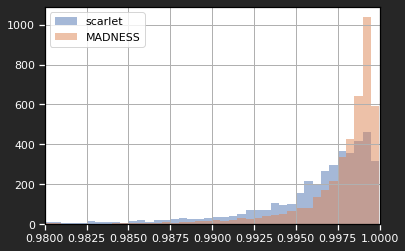

In [31]:
bins = np.arange(0.95, 1, 0.0005)
cov_band = 'r'
plt.hist(scarlet_results[cov_band + '_covariance'], bins=bins, alpha=0.5, label="scarlet")
plt.hist(madness_results[cov_band + '_covariance'], bins=bins, alpha=0.5, label="MADNESS")
plt.legend()
plt.xlim([0.98, 1])

### Plot the relative flux error

In [11]:
def gauss(x, sig, mu, a):
    return np.exp(-(x-mu)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig)

In [12]:
from scipy.optimize import curve_fit
from scipy.stats import norm

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.11040228855418605
Madness sig: 0.23083939374055426
Scarlet mu: -0.0015130764233139335
Scarlet sig: 0.2141418583398558


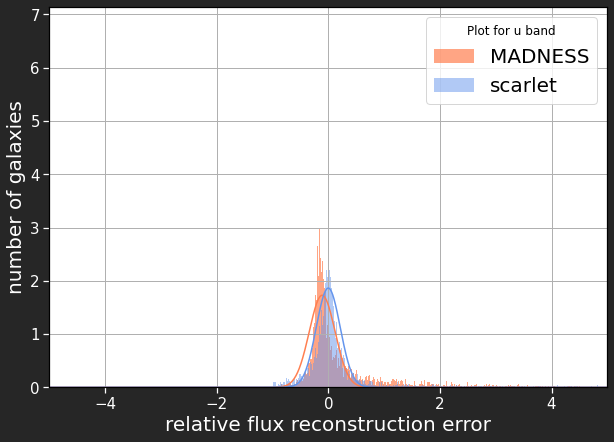

Madness mu: -0.013006145181201467
Madness sig: 0.09252159738402134
Scarlet mu: 0.0011030871124979467
Scarlet sig: 0.0855543910324783


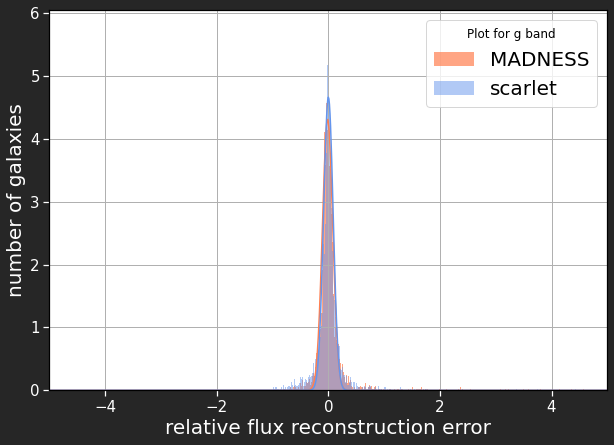

Madness mu: -0.01593510360155844
Madness sig: 0.08480659000798255
Scarlet mu: 0.005198234150702365
Scarlet sig: 0.07267849583800193


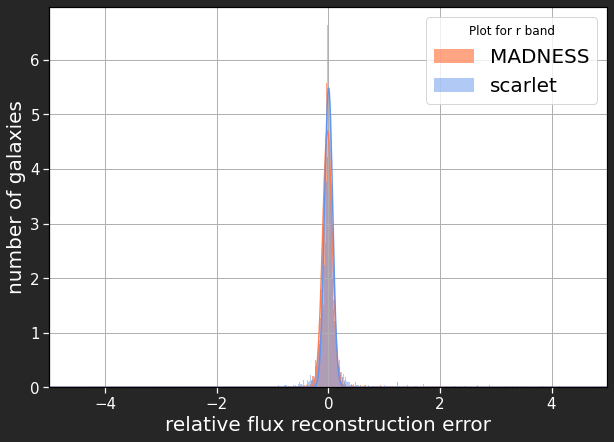

Madness mu: -0.015188986257691252
Madness sig: 0.08502704420631277
Scarlet mu: 0.008145517777728145
Scarlet sig: 0.07711092989525667


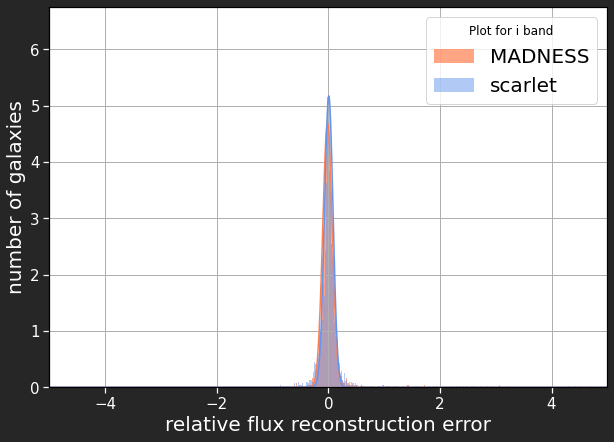

Madness mu: -0.00888749359999736
Madness sig: 0.11044213444403896
Scarlet mu: 0.005596811830917636
Scarlet sig: 0.09753868272715682


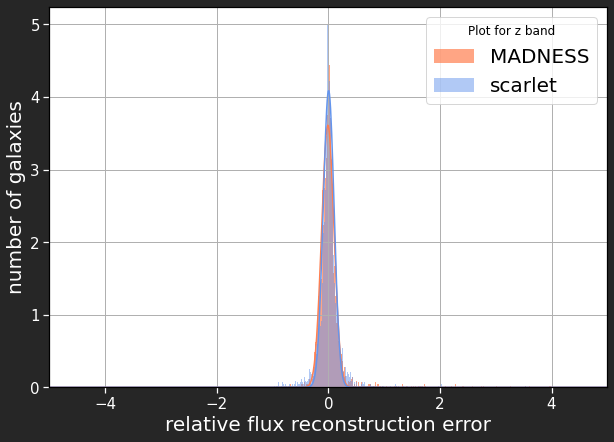

Madness mu: 0.012853097465474856
Madness sig: 0.19618304988355068
Scarlet mu: 0.0019322936331545935
Scarlet sig: 0.14831559340820635


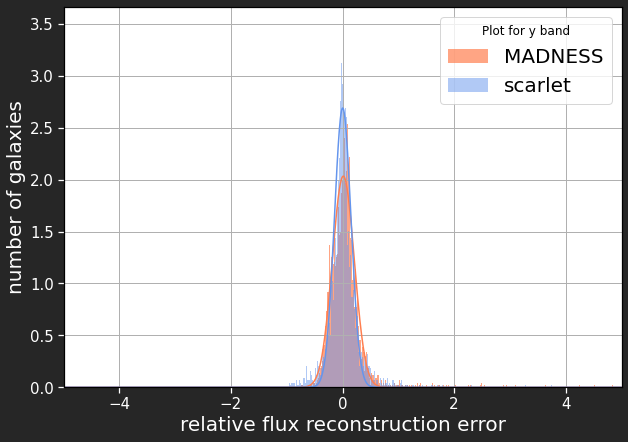

In [13]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].value
    madness_predicted_flux = madness_results[band+"_predicted_flux"].value

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 1000

    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])
    
    sns.set_theme(style={"axes.grid": True,
                     'axes.labelcolor': 'white',
                     'figure.facecolor': '.15',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'text.color': 'black',
                     'image.cmap': 'viridis',})
    plt.figure(figsize=(10, 7))
    bins = np.arange(-5, 5, 0.01)
    plt.hist(
        madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.7,
        color="coral",
        label="MADNESS",
    )
    plt.plot(bins, gauss(bins, *madness_fit[0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    plt.hist(
        scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="cornflowerblue",
        label="scarlet",
    )
    plt.plot(
        bins, gauss(bins, scarlet_fit[0][0], scarlet_fit[0][1], scarlet_fit[0][2]), color="cornflowerblue"
    )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-5, 5])
    plt.show()

Madness mu: -0.11040228855418605
Madness sig: 0.23083939374055426
Scarlet mu: -0.0015130764233139335
Scarlet sig: 0.2141418583398558


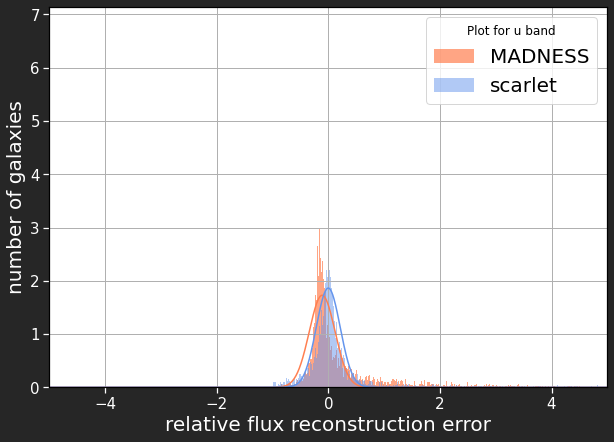

Madness mu: -0.013006145181201467
Madness sig: 0.09252159738402134
Scarlet mu: 0.0011030871124979467
Scarlet sig: 0.0855543910324783


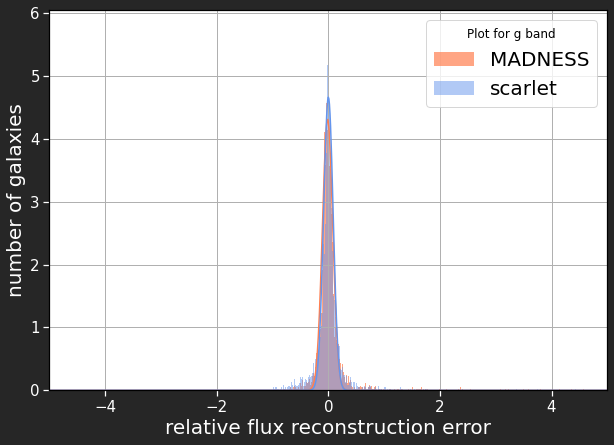

Madness mu: -0.01593510360155844
Madness sig: 0.08480659000798255
Scarlet mu: 0.005198234150702365
Scarlet sig: 0.07267849583800193


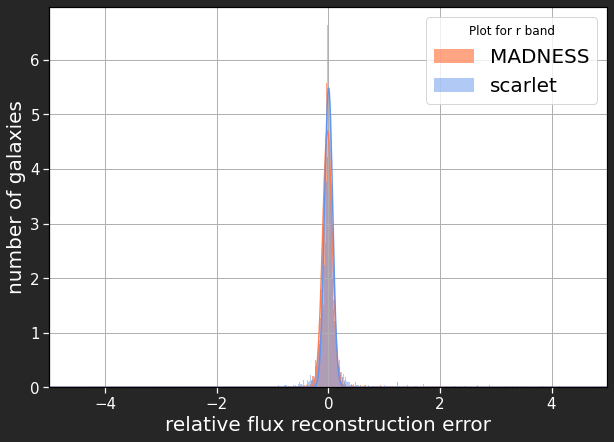

Madness mu: -0.015188986257691252
Madness sig: 0.08502704420631277
Scarlet mu: 0.008145517777728145
Scarlet sig: 0.07711092989525667


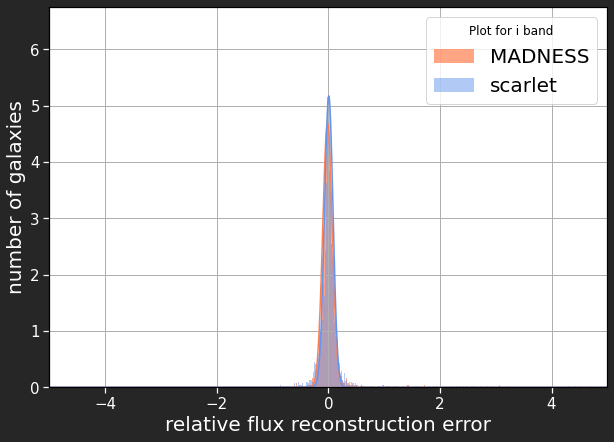

Madness mu: -0.00888749359999736
Madness sig: 0.11044213444403896
Scarlet mu: 0.005596811830917636
Scarlet sig: 0.09753868272715682


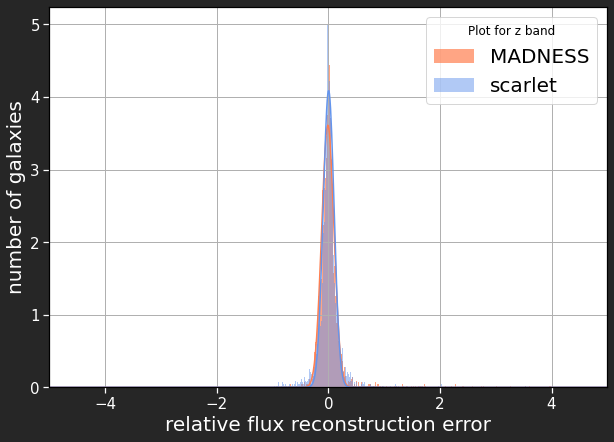

Madness mu: 0.012853097465474856
Madness sig: 0.19618304988355068
Scarlet mu: 0.0019322936331545935
Scarlet sig: 0.14831559340820635


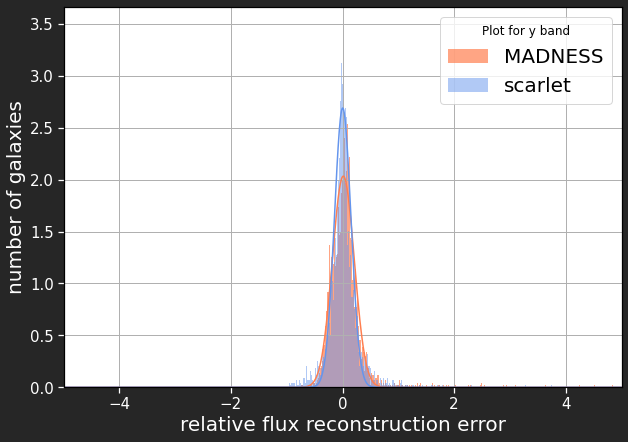

In [14]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].value
    madness_predicted_flux = madness_results[band+"_predicted_flux"].value

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 1000

    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])
    
    sns.set_theme(style={"axes.grid": True,
                     'axes.labelcolor': 'white',
                     'figure.facecolor': '.15',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'text.color': 'black',
                     'image.cmap': 'viridis',})
    plt.figure(figsize=(10, 7))
    bins = np.arange(-5, 5, 0.01)
    plt.hist(
        madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.7,
        color="coral",
        label="MADNESS",
    )
    plt.plot(bins, gauss(bins, *madness_fit[0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    plt.hist(
        scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="cornflowerblue",
        label="scarlet",
    )
    plt.plot(
        bins, gauss(bins, scarlet_fit[0][0], scarlet_fit[0][1], scarlet_fit[0][2]), color="cornflowerblue"
    )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-5, 5])
    plt.show()

# Compare apperture photometry

In [15]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
6846.603924556973,345.63698975445817,0,53040.52799949647,1390.1484512116863,0,145319.52455429078,3195.6092259536363,0,191232.85067779542,3857.5781760548944,0,170290.1605142212,4463.841104152902,0,83760.32484249114,4784.979128089276,0,0,0,0
44.59037703275667,345.5490302188045,0,26266.874303152563,1389.7946788554777,0,53220.237075805664,3194.7959903568185,0,43322.28072479249,3856.596479086191,0,25578.68781270504,4462.705122176459,0,11304.581603507995,4783.76142120403,0,1,0,0
5588.7367781448365,345.72492691139684,0,37397.6571255493,1390.502133560931,0,73220.94615570069,3196.4222546465917,0,65000.18975044253,3858.5596232596954,0,41914.76630447387,4464.976797112164,0,28164.77052259445,4786.196525164842,0,2,0,0
3787.510119018555,345.63698975445817,0,27140.212780336147,1390.1484512116863,0,70002.69896087646,3195.6092259536367,0,88299.57568771362,3857.578176054894,0,68070.98747512817,4463.8411041529025,0,39351.25132247926,4784.979128089276,0,3,0,0
25357.02778778076,345.7249269113968,0,218932.8644213867,1390.5021335609306,0,494933.27039794927,3196.4222546465917,0,491689.6596020508,3858.559623259695,0,336088.6365759277,4464.976797112165,0,158697.90422180181,4786.196525164843,0,4,0,0
3459.6075568223,345.7249269113968,0,43487.8071387577,1390.5021335609308,0,167850.6757894898,3196.422254646592,0,144926.6741735077,3858.5596232596945,0,99661.31087402345,4464.976797112165,0,44404.13611999511,4786.196525164843,0,5,0,0
53836.98027923585,345.10889626076045,0,398067.6327050781,1388.0244645606035,0,1170836.6590283206,3190.72670327623,0,1025100.1310839847,3851.684241098302,0,843629.1527734376,4457.020869299919,0,497253.8163842773,4777.668231339427,0,6,0,0
3063.4719926333432,345.9886042805344,0,17604.286454029076,1391.5626412530808,0,77641.0349208641,3198.8601008796873,0,101680.49662017822,3861.5024681948607,0,109594.59147605898,4468.3821440902975,0,67563.49747711181,4789.846859895418,0,7,0,0
287.5308736562729,345.6369897544582,0,16024.106986141202,1390.1484512116863,0,136186.8445191955,3195.609225953637,0,197812.97146076206,3857.578176054894,0,173095.03388488773,4463.841104152902,0,99938.46098693847,4784.979128089275,0,8,0,0


In [16]:
madness_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
6847.45656260729,345.63698975445817,0,53131.33898017885,1390.1484512116863,0,145804.33241744997,3195.6092259536363,0,191650.61441864012,3857.5781760548944,0,170463.70355133052,4463.841104152902,0,84076.16039719581,4784.979128089276,0,0,0,0
47.459179165363146,345.5490302188045,0,26323.555265231134,1389.7946788554777,0,53489.01316005707,3194.7959903568185,0,43628.474194183356,3856.596479086191,0,25811.792078752518,4462.705122176459,0,11432.197735557556,4783.76142120403,0,1,0,0
5590.764822425842,345.72492691139684,0,37419.70870819091,1390.502133560931,0,73301.64343635557,3196.4222546465917,0,65076.95969303132,3858.5596232596954,0,41969.00758857727,4464.976797112164,0,28193.14024654388,4786.196525164842,0,2,0,0
3909.0467278146743,345.63698975445817,0,27739.194132030007,1390.1484512116863,0,70822.57191593168,3195.6092259536367,0,89770.27080177308,3857.578176054894,0,69166.22020874024,4463.8411041529025,0,40002.20117801666,4784.979128089276,0,3,0,0
25353.935143127444,345.7249269113968,0,218922.604107666,1390.5021335609306,0,495106.7182739259,3196.4222546465917,0,491722.7853393556,3858.559623259695,0,336182.5692590332,4464.976797112165,0,158737.5517853546,4786.196525164843,0,4,0,0
3460.017986605167,345.7249269113968,0,43475.8690555668,1390.5021335609308,0,167867.11070343017,3196.422254646592,0,145005.13623428348,3858.5596232596945,0,99687.02130447392,4464.976797112165,0,44447.340435256956,4786.196525164843,0,5,0,0
53848.16345397949,345.10889626076045,0,398105.1566015626,1388.0244645606035,0,1170924.5016064453,3190.72670327623,0,1025284.3560058594,3851.684241098302,0,843771.5100683596,4457.020869299919,0,497359.87905151374,4777.668231339427,0,6,0,0
3285.9248035907744,345.9886042805344,0,19779.33784183026,1391.5626412530808,0,83748.84937278744,3198.8601008796873,0,108290.31336105346,3861.5024681948607,0,113715.98803593636,4468.3821440902975,0,69662.8651835251,4789.846859895418,0,7,0,0
1736.6775369000436,345.6369897544582,0,14362.352931442261,1390.1484512116863,0,146295.9681845093,3195.609225953637,0,175009.47865646365,3857.578176054894,0,180392.37357101438,4463.841104152902,0,92757.93874149321,4784.979128089275,0,8,0,0


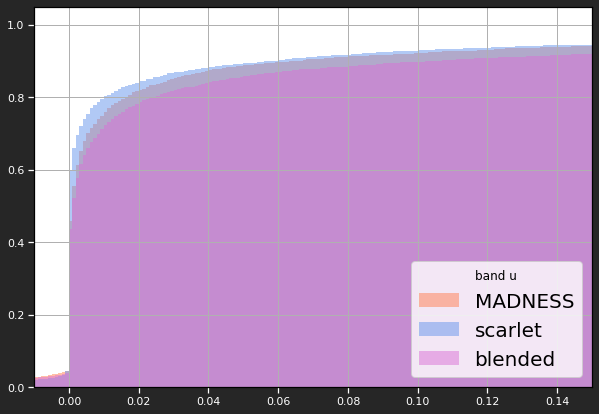

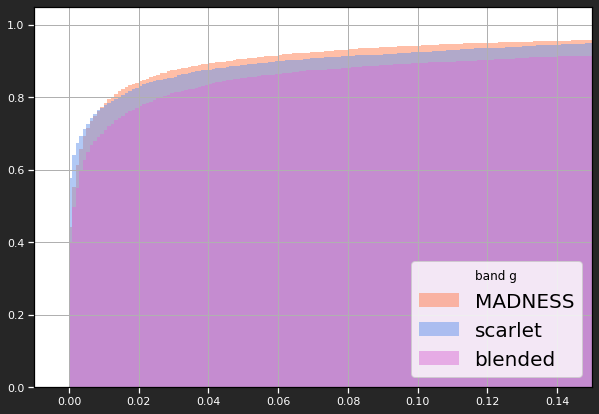

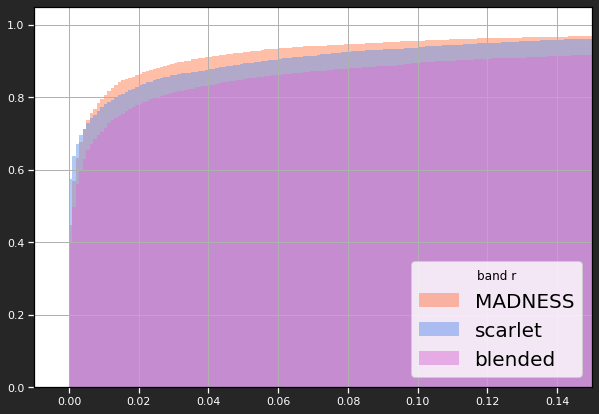

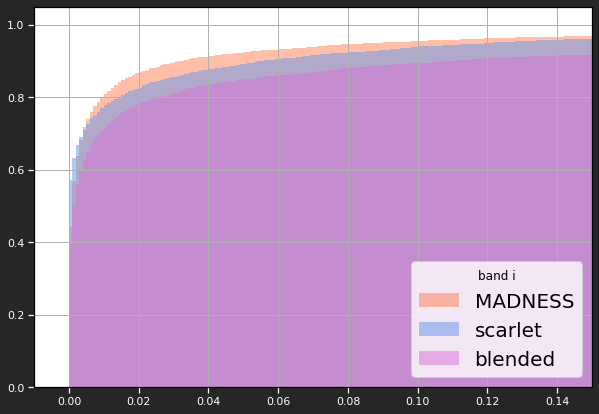

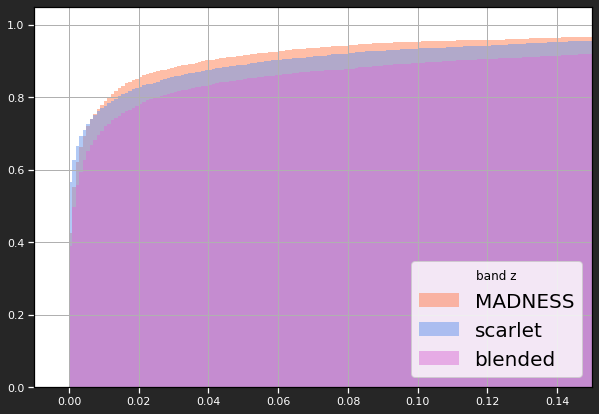

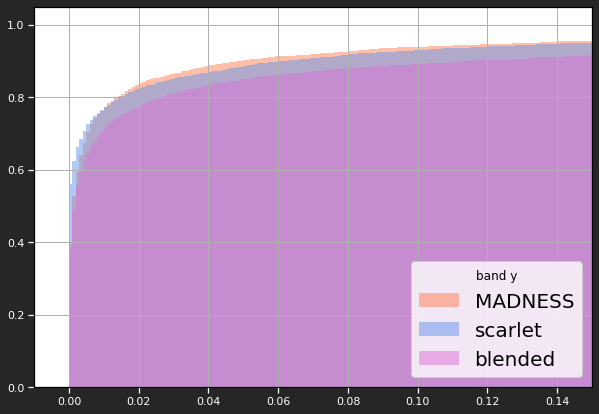

In [17]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    plt.figure(figsize=(10, 7))
    bins = np.arange(-1, 1, 0.001)
    plt.hist(
        np.abs((madness_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value)) / actual_photometry[band+"_flux"].value,
        bins=bins,
        alpha=0.5,
        density=True,
        label="MADNESS",
        cumulative=True,
        color="coral"
    )

    plt.hist(
        np.abs((scarlet_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value)) / actual_photometry[band+"_flux"].value,
        bins=bins,
        density=True,
        alpha=0.5,
        label="scarlet",
        cumulative=True,
        color="cornflowerblue"
    )

    plt.hist(
        (blended_photometry[band+"_flux"].value - actual_photometry[band+"_flux"].value) / actual_photometry[band+"_flux"].value,
        bins=bins,
        alpha=0.5,
        density=True,
        label="blended",
        cumulative=True,
        color="orchid",
    )
    plt.xlim([-.01, .15])

    plt.legend(fontsize=20, title="band " + band, loc="lower right")
    plt.show()

# error variation plots

/tmp/ipykernel_15364/4022407744.py:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  h = plt.hist2d(madness_results['size'].value, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
/tmp/ipykernel_15364/4022407744.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(h[3])


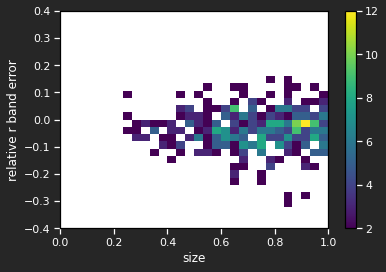

In [18]:
h = plt.hist2d(madness_results['size'].value, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
plt.xlabel("size")
plt.ylabel("relative r band error")
plt.colorbar(h[3])
#plt.ylim(-.1,.1)

# Plot SNR

In [19]:
madness_results

u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,r_predicted_flux,r_blendedness,i_covariance,i_actual_flux,i_predicted_flux,i_blendedness,z_covariance,z_actual_flux,z_predicted_flux,z_blendedness,y_covariance,y_actual_flux,y_predicted_flux,y_blendedness,galaxy_num,size,field_num,file_num,galtileid,ra,dec,redshift,fluxnorm_bulge,fluxnorm_disk,fluxnorm_agn,a_b,a_d,b_b,b_d,pa_bulge,pa_disk,u_ab,g_ab,r_ab,i_ab,z_ab,y_ab,r_band_snr,ref_mag,btk_size,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,float64,float64,float32,float64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.9971455836775488,11091.220029558186,9438.254,0.0016514175897172079,0.9983516164920813,85001.56183074706,80948.34,0.004883096828267819,0.9990171501320735,220388.43841739534,232037.94,0.00923764792178261,0.9990922601593981,286999.2965947264,285853.7,0.008571050323501583,0.998909429174452,243663.07545073424,246695.42,0.007632375685734383,0.9986145794422626,124399.1974934924,144224.55,0.008140499117066158,0,2.934391691481652,0,0,402700974452,12.312215341975133,1.1502970222887008,0.92939889431,1.52888593949e-19,1.87639304513e-17,0.0,0.103462003171,0.63225120306,0.0748507976532,0.374639600515,224.244827271,224.244827271,24.3499164581,24.3860778809,24.0959835052,23.4892063141,23.1251525879,23.0250339508,96.86181000637494,23.4892063141,2.934391691481652,163.5610767830227,107.75148512149103,0.0,0.0,0.0,0.0,0.0,0.0,-0.14903375092217255,-0.04768404242757,0.05285893927222072,-0.003991679102768359,0.012444833582833395,0.15936878839226207
0.9957483692762555,1037.598037178862,3711.7615,0.011283379026122198,0.9975296172156712,45971.83284291776,37919.273,0.00403982974440964,0.9973628442030025,100247.58207408001,77802.58,0.007919439755335489,0.9966479533900511,70700.76099157345,60546.633,0.012728962465253346,0.995364533989561,41297.25010053493,40969.703,0.016476949193440116,0.9887535719015546,18242.641931918188,22497.434,0.020205648337178084,1,3.20668812036312,0,0,402703695649,14.544104257126662,7.114506678623506,3.22528791428,0.0,1.97217807852e-18,0.0,0.0,0.688130497932,0.0,0.623354494572,0.0,341.729522705,26.9207649231,25.0528125763,24.9506931305,25.0097541809,25.0517215729,25.1087379456,44.60263238955758,25.0097541809,3.20668812036312,174.72052140621386,137.57253349562268,0.0,0.0,0.0,0.0,0.0,0.0,2.577263392576695,-0.17516289665745421,-0.22389571383870202,-0.14362120063012732,-0.007931447608195355,0.23323330456798738
0.9969072078494402,8720.613220749277,7433.157,0.0014067700349087442,0.9975578310126321,66592.48838640552,69153.93,0.0019020802710597584,0.9978480610685267,128773.7828390781,135635.5,0.0033745694277356186,0.9976062581942525,103375.18918467802,106745.87,0.003851706499187313,0.9966035821824032,74608.25445650215,75942.125,0.0036501081473753194,0.9941765144410079,43778.49377571314,41909.836,0.003205386173519842,2,2.9987727965302757,0,0,402702291885,-6.411101875014888,14.782820665450881,1.6642203331,1.95283900939e-19,7.89798335438e-18,0.0,0.141510695219,0.651383280754,0.139605402946,0.627531170845,140.861190796,140.861190796,24.6102561951,24.6504096985,24.6787395477,24.5972042084,24.4094905853,24.1582489014,57.137388551787396,24.5972042084,2.9987727965302757,69.94449061462393,175.9141034893985,0.0,0.0,0.0,0.0,0.0,0.0,-0.14763365391822283,0.038464417881963225,0.05328504769869674,0.032606257162928344,0.01787

In [20]:
madness_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
6847.45656260729,345.63698975445817,0,53131.33898017885,1390.1484512116863,0,145804.33241744997,3195.6092259536363,0,191650.61441864012,3857.5781760548944,0,170463.70355133052,4463.841104152902,0,84076.16039719581,4784.979128089276,0,0,0,0
47.459179165363146,345.5490302188045,0,26323.555265231134,1389.7946788554777,0,53489.01316005707,3194.7959903568185,0,43628.474194183356,3856.596479086191,0,25811.792078752518,4462.705122176459,0,11432.197735557556,4783.76142120403,0,1,0,0
5590.764822425842,345.72492691139684,0,37419.70870819091,1390.502133560931,0,73301.64343635557,3196.4222546465917,0,65076.95969303132,3858.5596232596954,0,41969.00758857727,4464.976797112164,0,28193.14024654388,4786.196525164842,0,2,0,0
3909.0467278146743,345.63698975445817,0,27739.194132030007,1390.1484512116863,0,70822.57191593168,3195.6092259536367,0,89770.27080177308,3857.578176054894,0,69166.22020874024,4463.8411041529025,0,40002.20117801666,4784.979128089276,0,3,0,0
25353.935143127444,345.7249269113968,0,218922.604107666,1390.5021335609306,0,495106.7182739259,3196.4222546465917,0,491722.7853393556,3858.559623259695,0,336182.5692590332,4464.976797112165,0,158737.5517853546,4786.196525164843,0,4,0,0
3460.017986605167,345.7249269113968,0,43475.8690555668,1390.5021335609308,0,167867.11070343017,3196.422254646592,0,145005.13623428348,3858.5596232596945,0,99687.02130447392,4464.976797112165,0,44447.340435256956,4786.196525164843,0,5,0,0
53848.16345397949,345.10889626076045,0,398105.1566015626,1388.0244645606035,0,1170924.5016064453,3190.72670327623,0,1025284.3560058594,3851.684241098302,0,843771.5100683596,4457.020869299919,0,497359.87905151374,4777.668231339427,0,6,0,0
3285.9248035907744,345.9886042805344,0,19779.33784183026,1391.5626412530808,0,83748.84937278744,3198.8601008796873,0,108290.31336105346,3861.5024681948607,0,113715.98803593636,4468.3821440902975,0,69662.8651835251,4789.846859895418,0,7,0,0
1736.6775369000436,345.6369897544582,0,14362.352931442261,1390.1484512116863,0,146295.9681845093,3195.609225953637,0,175009.47865646365,3857.578176054894,0,180392.37357101438,4463.841104152902,0,92757.93874149321,4784.979128089275,0,8,0,0


In [21]:
actual_photometry

u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,i_fluxerrs,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,galaxy_num,field_num,file_num
float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,float64,float64,int16,int64,int64,int64
6846.603924556973,345.63698975445817,0,53040.52799949647,1390.1484512116863,0,145319.52455429078,3195.6092259536363,0,191232.85067779542,3857.5781760548944,0,170290.1605142212,4463.841104152902,0,83760.32484249114,4784.979128089276,0,0,0,0
44.59037703275667,345.5490302188045,0,26266.874303152563,1389.7946788554777,0,53220.237075805664,3194.7959903568185,0,43322.28072479249,3856.596479086191,0,25578.68781270504,4462.705122176459,0,11304.581603507995,4783.76142120403,0,1,0,0
5588.7367781448365,345.72492691139684,0,37397.6571255493,1390.502133560931,0,73220.94615570069,3196.4222546465917,0,65000.18975044253,3858.5596232596954,0,41914.76630447387,4464.976797112164,0,28164.77052259445,4786.196525164842,0,2,0,0
3787.510119018555,345.63698975445817,0,27140.212780336147,1390.1484512116863,0,70002.69896087646,3195.6092259536367,0,88299.57568771362,3857.578176054894,0,68070.98747512817,4463.8411041529025,0,39351.25132247926,4784.979128089276,0,3,0,0
25357.02778778076,345.7249269113968,0,218932.8644213867,1390.5021335609306,0,494933.27039794927,3196.4222546465917,0,491689.6596020508,3858.559623259695,0,336088.6365759277,4464.976797112165,0,158697.90422180181,4786.196525164843,0,4,0,0
3459.6075568223,345.7249269113968,0,43487.8071387577,1390.5021335609308,0,167850.6757894898,3196.422254646592,0,144926.6741735077,3858.5596232596945,0,99661.31087402345,4464.976797112165,0,44404.13611999511,4786.196525164843,0,5,0,0
53836.98027923585,345.10889626076045,0,398067.6327050781,1388.0244645606035,0,1170836.6590283206,3190.72670327623,0,1025100.1310839847,3851.684241098302,0,843629.1527734376,4457.020869299919,0,497253.8163842773,4777.668231339427,0,6,0,0
3063.4719926333432,345.9886042805344,0,17604.286454029076,1391.5626412530808,0,77641.0349208641,3198.8601008796873,0,101680.49662017822,3861.5024681948607,0,109594.59147605898,4468.3821440902975,0,67563.49747711181,4789.846859895418,0,7,0,0
287.5308736562729,345.6369897544582,0,16024.106986141202,1390.1484512116863,0,136186.8445191955,3195.609225953637,0,197812.97146076206,3857.578176054894,0,173095.03388488773,4463.841104152902,0,99938.46098693847,4784.979128089275,0,8,0,0


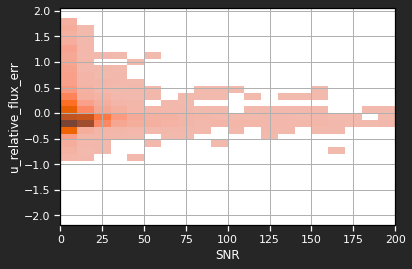

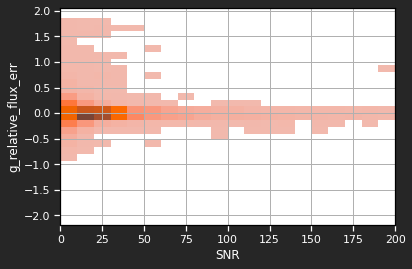

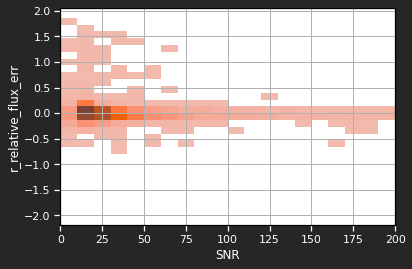

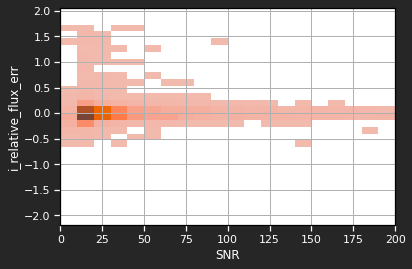

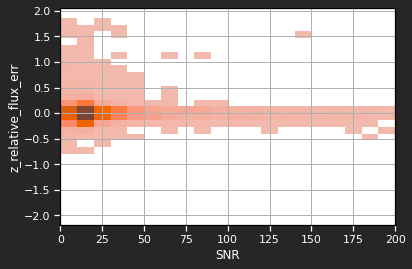

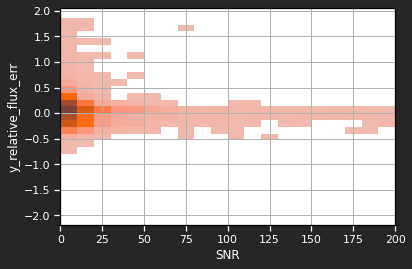

In [35]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,1000,1000/100.0)
    y_bins = np.arange(-2, 2, 4/30.0)
    sns.histplot(x=snr, y=madness_results[band+ "_relative_flux_err"], bins=[x_bins, y_bins], kde=True, color='coral')
    plt.xlim(0,200)
    plt.xlabel("SNR")
    plt.show()

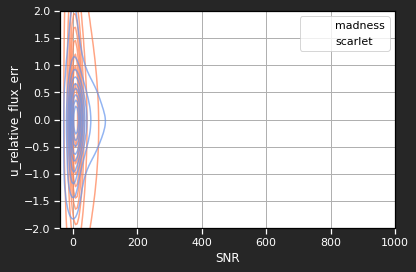

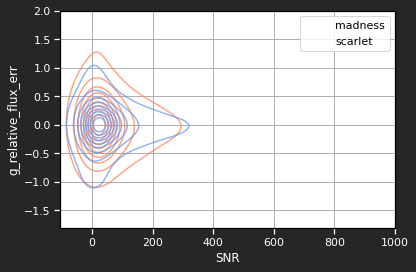

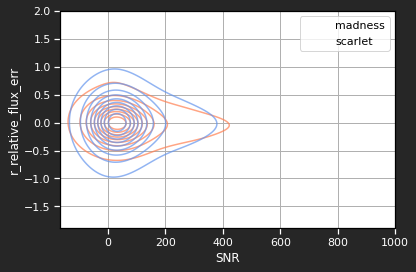

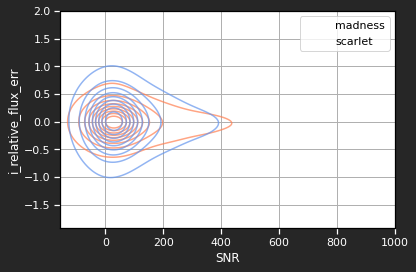

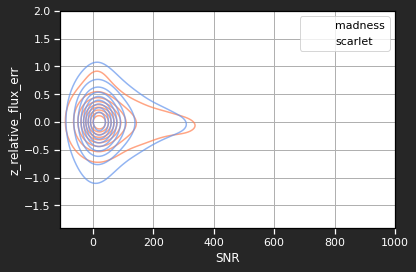

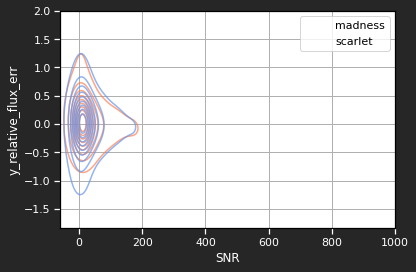

In [34]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    sns.kdeplot(x=snr, y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=.7, label="madness",  color="coral")
    sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet", color="cornflowerblue")
    #sns.legend()
    plt.xlabel("SNR")
    plt.legend()
    plt.show()

# Compare with blendedness

/tmp/ipykernel_15364/3305847454.py:2: RuntimeWarning: invalid value encountered in log
  snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])


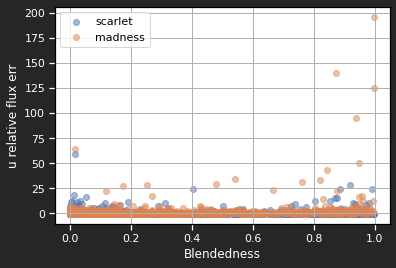

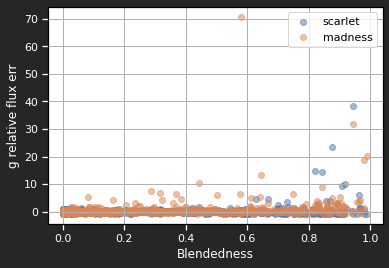

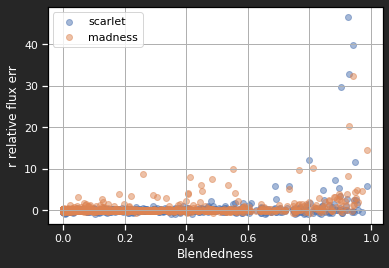

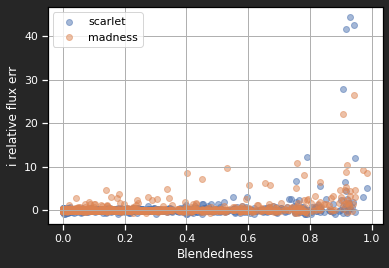

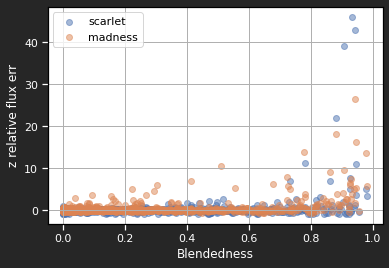

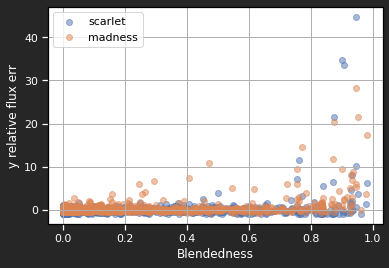

In [24]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    plt.scatter(scarlet_results[band+"_blendedness"], scarlet_results[band+ "_relative_flux_err"], alpha=.5, label="scarlet")
    plt.scatter(madness_results[band+"_blendedness"], madness_results[band+ "_relative_flux_err"], alpha=.5, label="madness")
    plt.xlabel("Blendedness")
    plt.ylabel(band+" relative flux err")
    #sns.kdeplot(x=madness_results[band+"_blendedness"], y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=.7)
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7
    plt.legend()
    plt.show()

In [25]:
# Validate SNR vs mag 

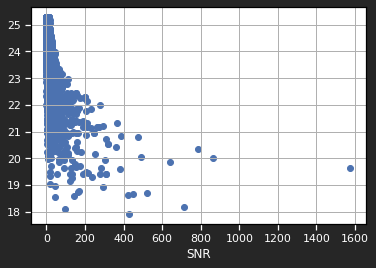

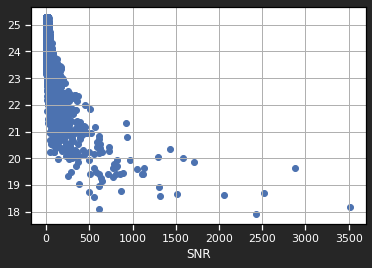

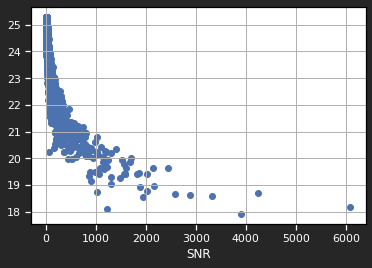

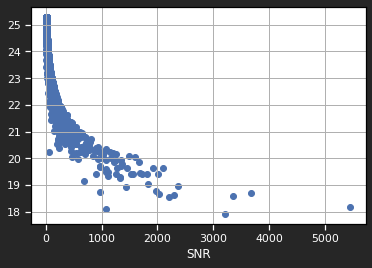

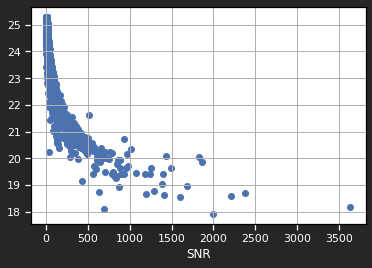

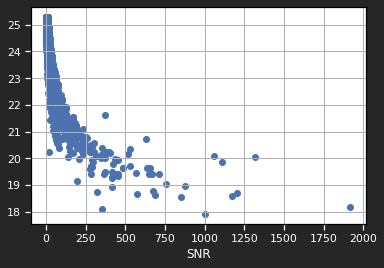

In [26]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    plt.scatter(x=snr, y=madness_results["ref_mag"])
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    plt.xlabel("SNR")
    plt.show()

Plot for u band


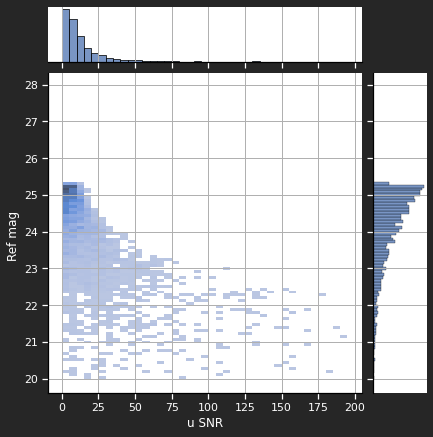

Plot for g band


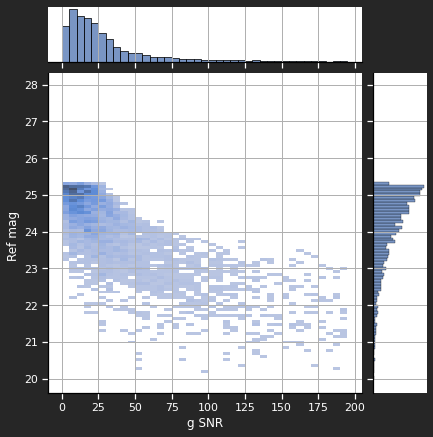

Plot for r band


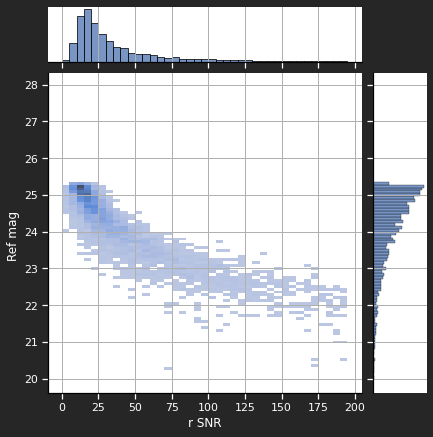

Plot for i band


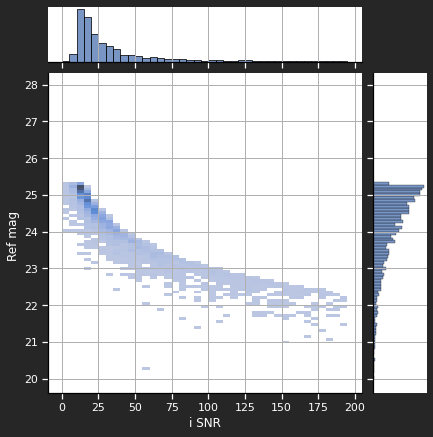

Plot for z band


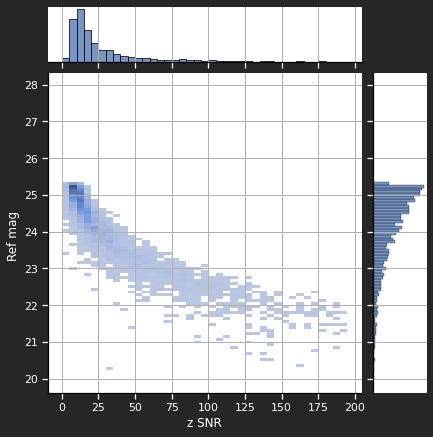

Plot for y band


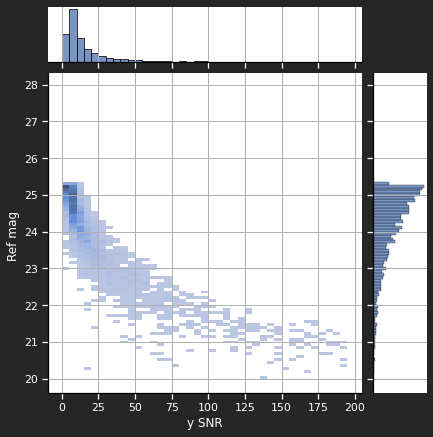

In [27]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    print(f"Plot for {band} band")
    snr = actual_photometry[band+"_flux"].value / actual_photometry[band+"_fluxerrs"].value
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,200,5.0)
    y_bins = np.arange(20, 28, 8/100.0)
    #sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, cbar=True)
    g = sns.JointGrid()
    sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, ax=g.ax_joint)
    g.ax_joint.set_xlabel(band + " SNR")
    g.ax_joint.set_ylabel("Ref mag ")
    sns.histplot(x=snr, ax=g.ax_marg_x, bins=x_bins, kde_kws={'clip': (0,500)})
    sns.histplot(y=madness_results["ref_mag"], ax=g.ax_marg_y, bins=y_bins)
    #ax.set(xlabel='SNR', ylabel='Ref Mag '+band)
    
    plt.show()

In [28]:
np.sum(madness_results['ref_mag']!=madness_results['mag_auto'])

KeyError: 'mag_auto'